In [1]:
#importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline

In [2]:
#reading the dataset
dataset=pd.read_csv(r'C:\Users\Aditi\Desktop\Projects\Iris\Iris.csv')

In [3]:
dataset.shape

(150, 6)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#displaying the column names
dataset.columns[0:]

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
#detailed info of the dataset
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
#first few rows of the dataset
dataset.iloc[:10]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [8]:
#checking if any null values present
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
data=dataset.iloc[:,1:]
data.groupby('Species').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [10]:
data.groupby('Species').median()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.0,3.4,1.50,0.2
Iris-versicolor,5.9,2.8,4.35,1.3
Iris-virginica,6.5,3.0,5.55,2.0


In [11]:
data.groupby('Species').agg(['mean','median'])

SepalLengthCm        SepalWidthCm        PetalLengthCm         \
                         mean median         mean median          mean median   
Species                                                                         
Iris-setosa             5.006    5.0        3.418    3.4         1.464   1.50   
Iris-versicolor         5.936    5.9        2.770    2.8         4.260   4.35   
Iris-virginica          6.588    6.5        2.974    3.0         5.552   5.55   

                PetalWidthCm         
                        mean median  
Species                              
Iris-setosa            0.244    0.2  
Iris-versicolor        1.326    1.3  
Iris-virginica         2.026    2.0

In [12]:
#another way of implementing the above said thing -
data.groupby('Species').agg([np.mean,np.median])

SepalLengthCm        SepalWidthCm        PetalLengthCm         \
                         mean median         mean median          mean median   
Species                                                                         
Iris-setosa             5.006    5.0        3.418    3.4         1.464   1.50   
Iris-versicolor         5.936    5.9        2.770    2.8         4.260   4.35   
Iris-virginica          6.588    6.5        2.974    3.0         5.552   5.55   

                PetalWidthCm         
                        mean median  
Species                              
Iris-setosa            0.244    0.2  
Iris-versicolor        1.326    1.3  
Iris-virginica         2.026    2.0

If we want to find the mean median for lengths and minimum and maximum for widths then -

In [13]:
agg_dict={fields: ['mean','median'] for fields in data.columns if fields !='Species'}
agg_dict

{'SepalLengthCm': ['mean', 'median'],
 'SepalWidthCm': ['mean', 'median'],
 'PetalLengthCm': ['mean', 'median'],
 'PetalWidthCm': ['mean', 'median']}

In [14]:
agg_dict['SepalWidthCm']=['max','min']
agg_dict['PetalWidthCm']=['max','min']
agg_dict

{'SepalLengthCm': ['mean', 'median'],
 'SepalWidthCm': ['max', 'min'],
 'PetalLengthCm': ['mean', 'median'],
 'PetalWidthCm': ['max', 'min']}

In [15]:
data.groupby('Species').agg(agg_dict)

SepalLengthCm        SepalWidthCm      PetalLengthCm         \
                         mean median          max  min          mean median   
Species                                                                       
Iris-setosa             5.006    5.0          4.4  2.3         1.464   1.50   
Iris-versicolor         5.936    5.9          3.4  2.0         4.260   4.35   
Iris-virginica          6.588    6.5          3.8  2.2         5.552   5.55   

                PetalWidthCm       
                         max  min  
Species                            
Iris-setosa              0.6  0.1  
Iris-versicolor          1.8  1.0  
Iris-virginica           2.5  1.4

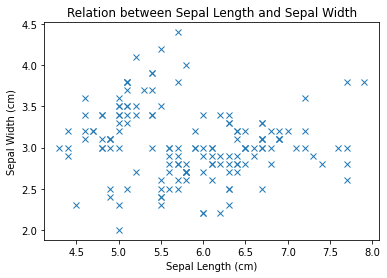

In [16]:
#Visualizations
plt.plot(dataset.SepalLengthCm,dataset.SepalWidthCm,ls='',marker='x')
plt.title("Relation between Sepal Length and Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

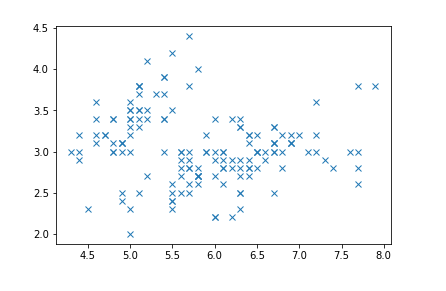

In [17]:
#Making some styling changes in the visualization
plt.plot(dataset.SepalLengthCm,dataset.SepalWidthCm,ls='',marker='x')
plt.title("Relation between Sepal Length and Sepal Width",fontweight='bold',fontsize=16,fontname='Lucida Handwriting',color='White')
plt.xlabel("Sepal Length (cm)",fontweight='bold',fontsize=16,fontname='Lucida Handwriting',color='White')
plt.ylabel("Sepal Width (cm)",fontweight='bold',fontsize=16,fontname='Lucida Handwriting',color='White')
plt.show()

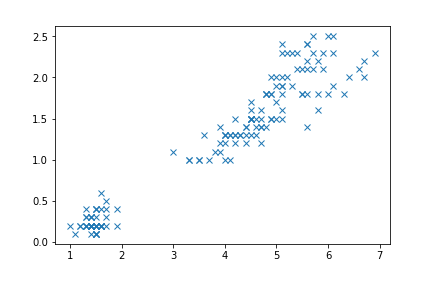

In [18]:
#Doing for petals
plt.plot(dataset.PetalLengthCm,dataset.PetalWidthCm,ls='',marker='x')
plt.title("Relation between Petal Length and Petal Width",fontweight='bold',fontsize=16,fontname='Lucida Handwriting',color='White')
plt.xlabel("Petal Length (cm)",fontweight='bold',fontsize=16,fontname='Lucida Handwriting',color='White')
plt.ylabel("Petal Width (cm)",fontweight='bold',fontsize=16,fontname='Lucida Handwriting',color='White')
plt.show()

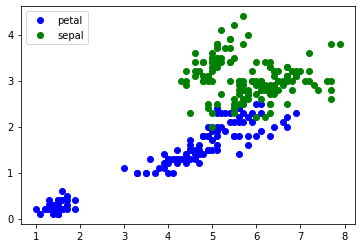

In [19]:
plt.plot(dataset.PetalLengthCm,dataset.PetalWidthCm,ls='',marker='o',label='petal',color='blue')
plt.plot(dataset.SepalLengthCm,dataset.SepalWidthCm,ls='',marker='o',label='sepal',color='green')
plt.legend()

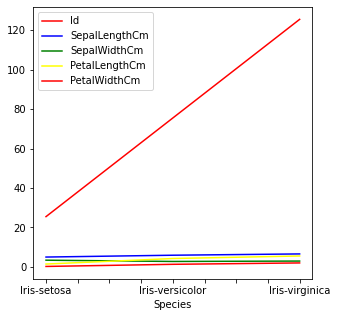

In [20]:
dataset.groupby('Species').mean().plot(color=['red','blue','green','yellow'],figsize=(5,5),label=['Sepal Length','Sepal Width','Petal Length','Petal Width'],fontsize=10)
plt.legend()

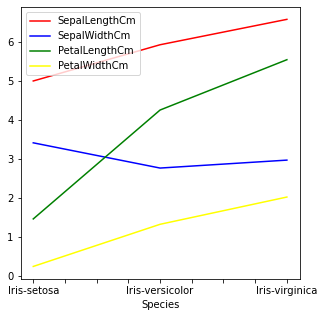

In [21]:
#displaying without id column
data.groupby('Species').mean().plot(color=['red','blue','green','yellow'],figsize=(5,5),label=['Sepal Length','Sepal Width','Petal Length','Petal Width'],fontsize=10)
plt.legend()

C:\Users\Aditi\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


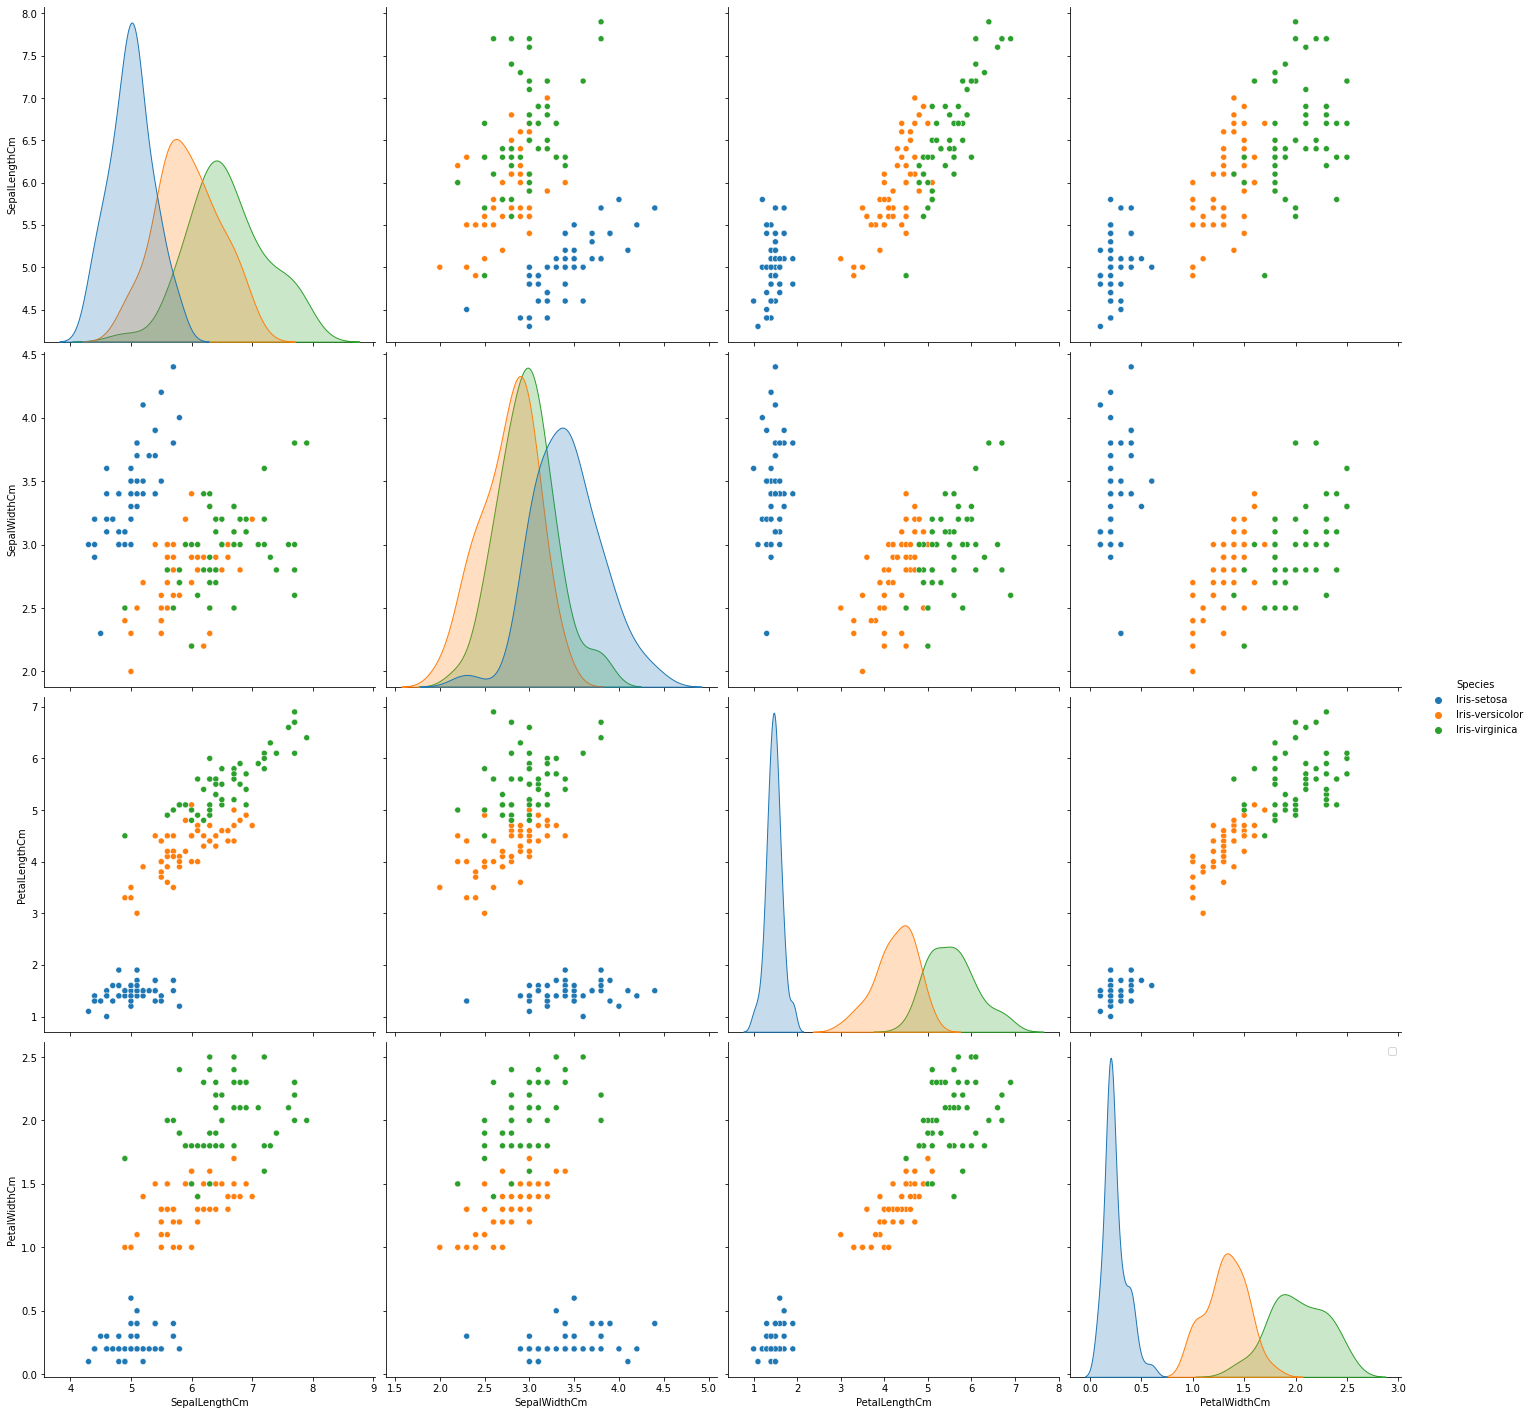

In [22]:
sns.pairplot(data,hue='Species',size=5)
plt.legend()

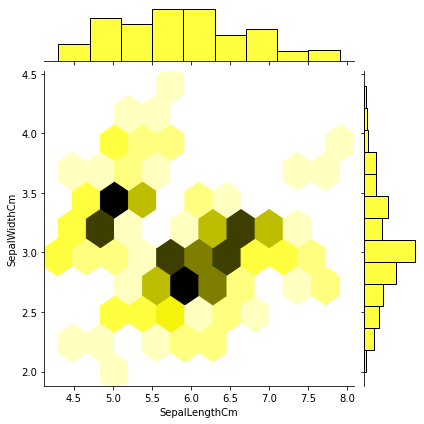

In [23]:
sns.jointplot(x=dataset.SepalLengthCm,y=dataset.SepalWidthCm,kind='hex',color='yellow')
#Drker colors shows where most values overlap

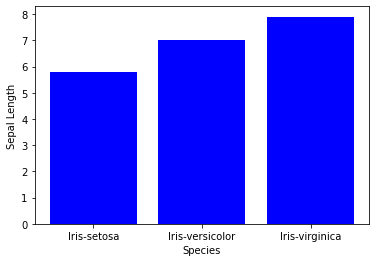

In [24]:
plt.bar(dataset.Species,dataset.SepalLengthCm,color = "blue")
plt.xlabel("Species")
plt.ylabel("Sepal Length")
plt.show()

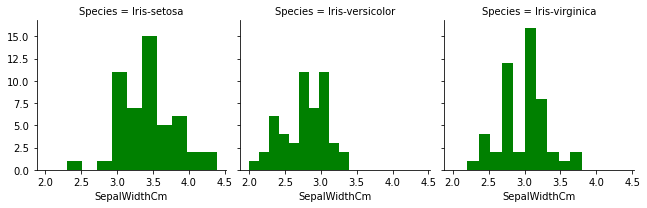

In [25]:
plot=sns.FacetGrid(data,col='Species',margin_titles=True)
plot.map(plt.hist,'SepalWidthCm',color='green')

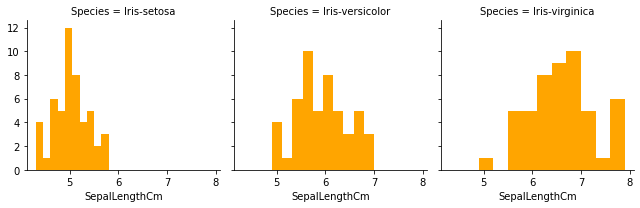

In [26]:
plot=sns.FacetGrid(data,col='Species',margin_titles=False)
plot.map(plt.hist,'SepalLengthCm',color='orange')

From the last 2 visualizations, it is visible that whether we assign the value to Margin-titles as True or False, itproduces the same result. Hence, we can concur that this option is experimental and may not work in all cases.

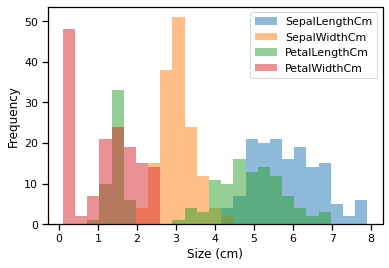

In [27]:
sns.set_context('notebook')
data.plot.hist(bins=25,alpha=0.5)
plt.xlabel("Size (cm)")
plt.legend()

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

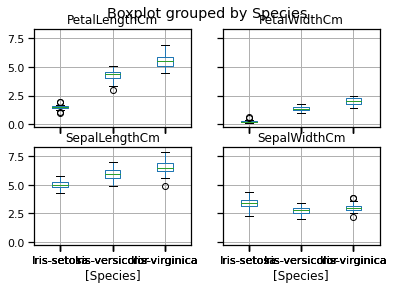

In [28]:
data.boxplot(by='Species')

In [29]:
#As the labels are overlapping, lets ncrease the size

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

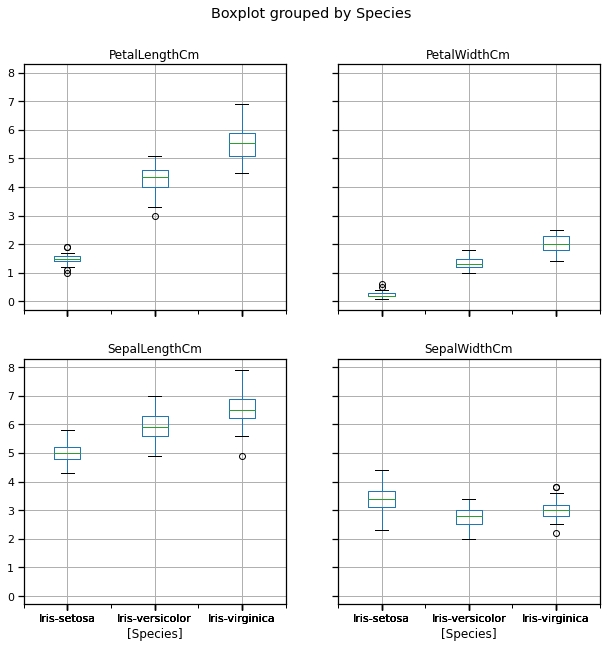

In [30]:
data.boxplot(by='Species',figsize=(10,10))

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[SepalLengthCm]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[SepalLengthCm]'>],
       [<AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[SepalLengthCm]'>,
        <AxesSubplot:>]], dtype=object)

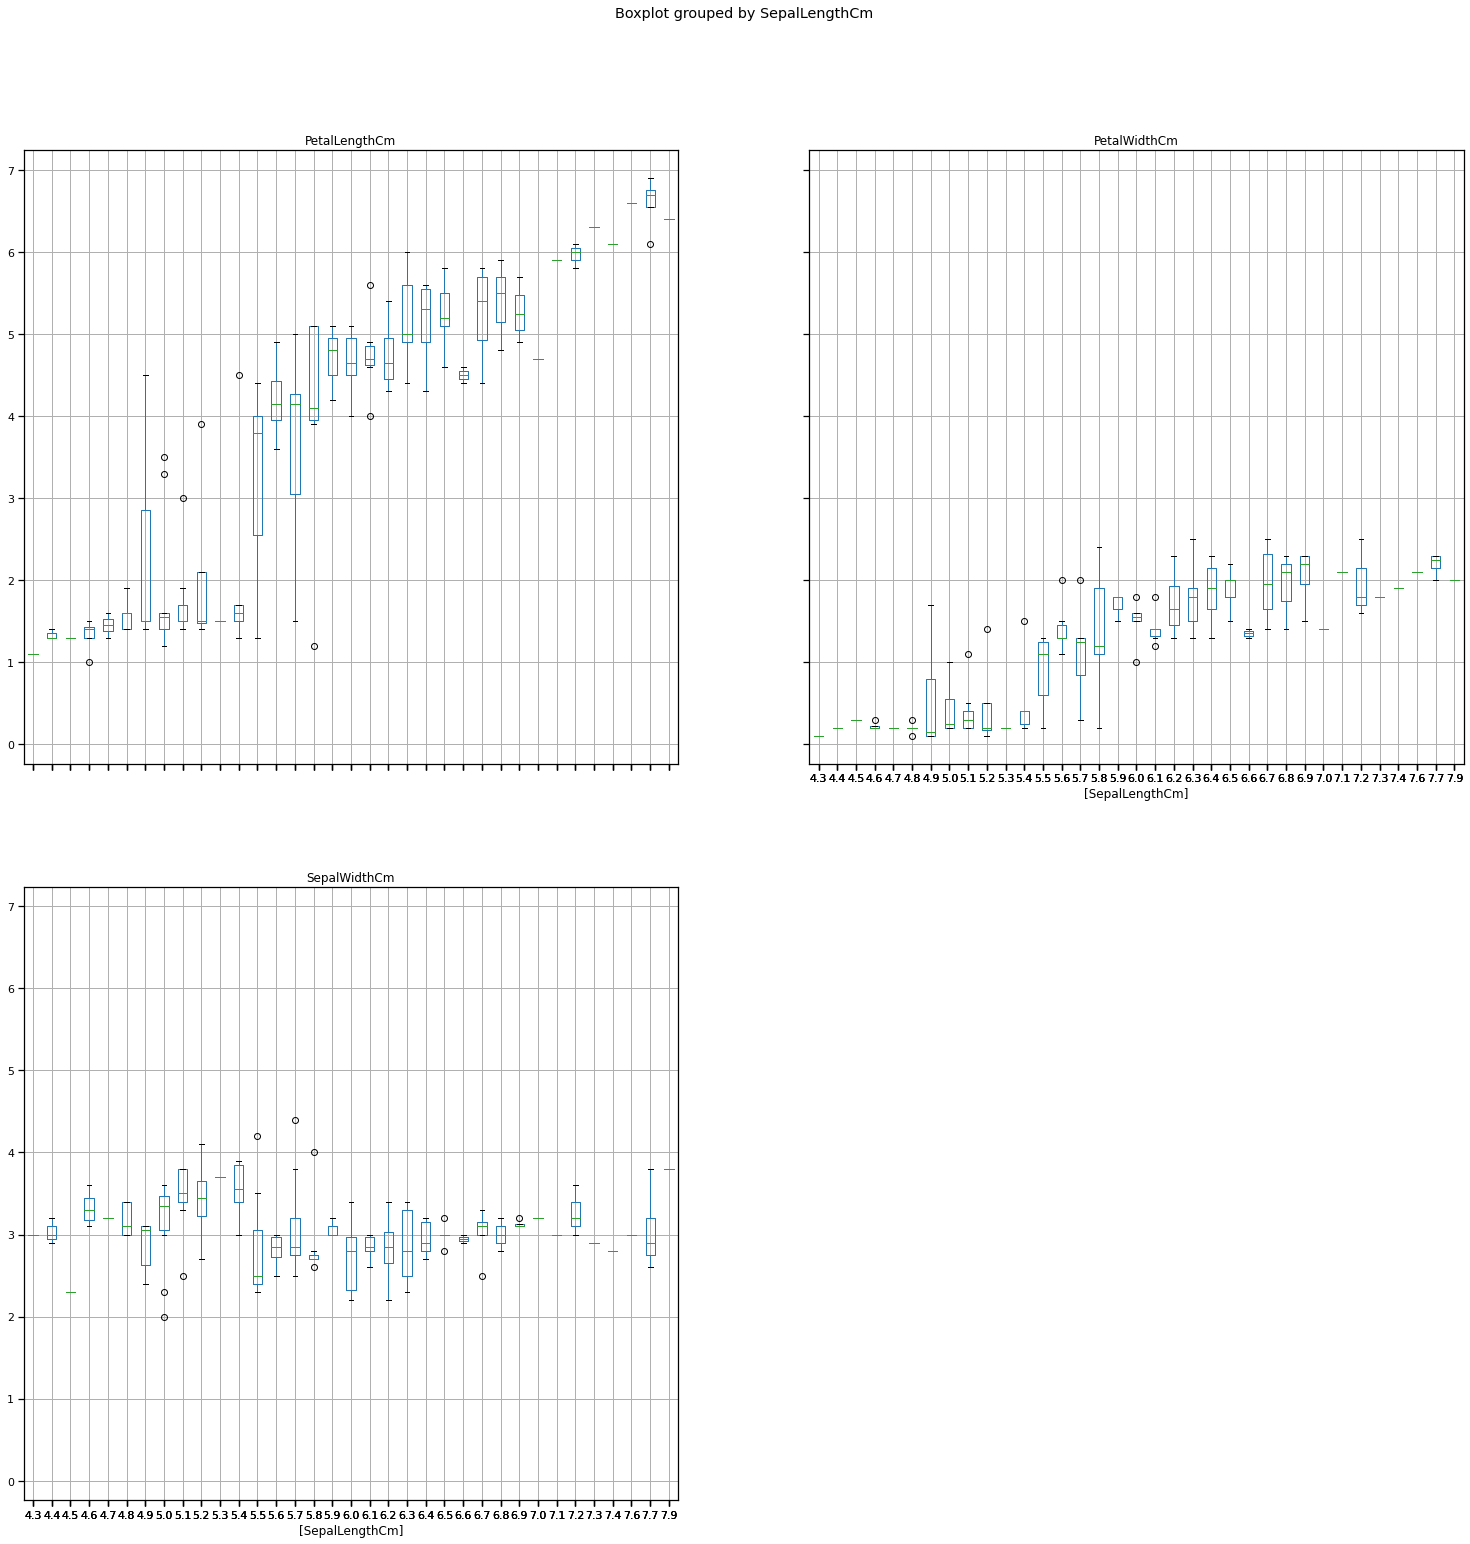

In [34]:
data.boxplot(by=('SepalLengthCm'),figsize=(25,25))

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[SepalWidthCm]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[SepalWidthCm]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[SepalWidthCm]'>,
        <AxesSubplot:>]], dtype=object)

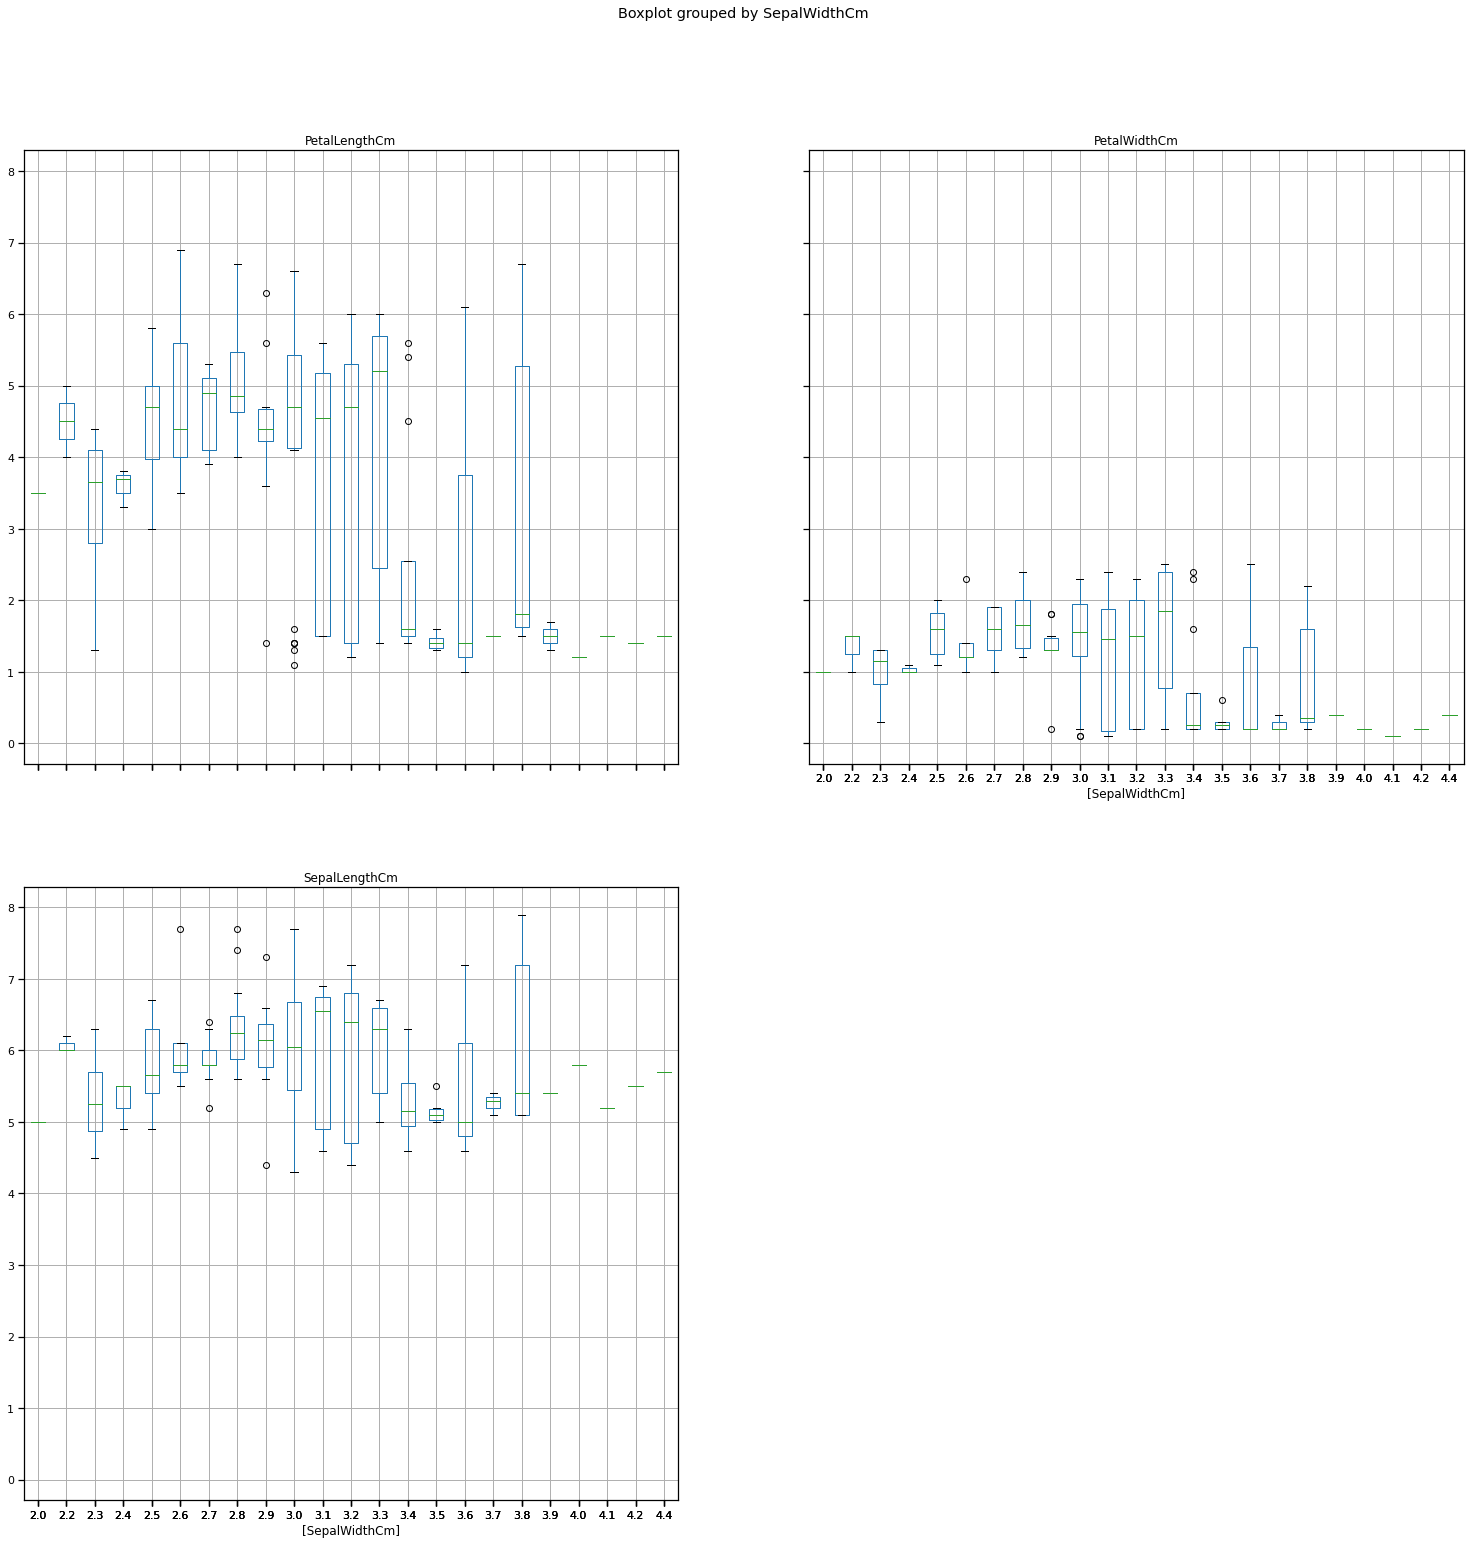

In [35]:
data.boxplot(by=('SepalWidthCm'),figsize=(25,25))

array([[<AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[PetalLengthCm]'>,
        <AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[PetalLengthCm]'>],
       [<AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[PetalLengthCm]'>,
        <AxesSubplot:>]], dtype=object)

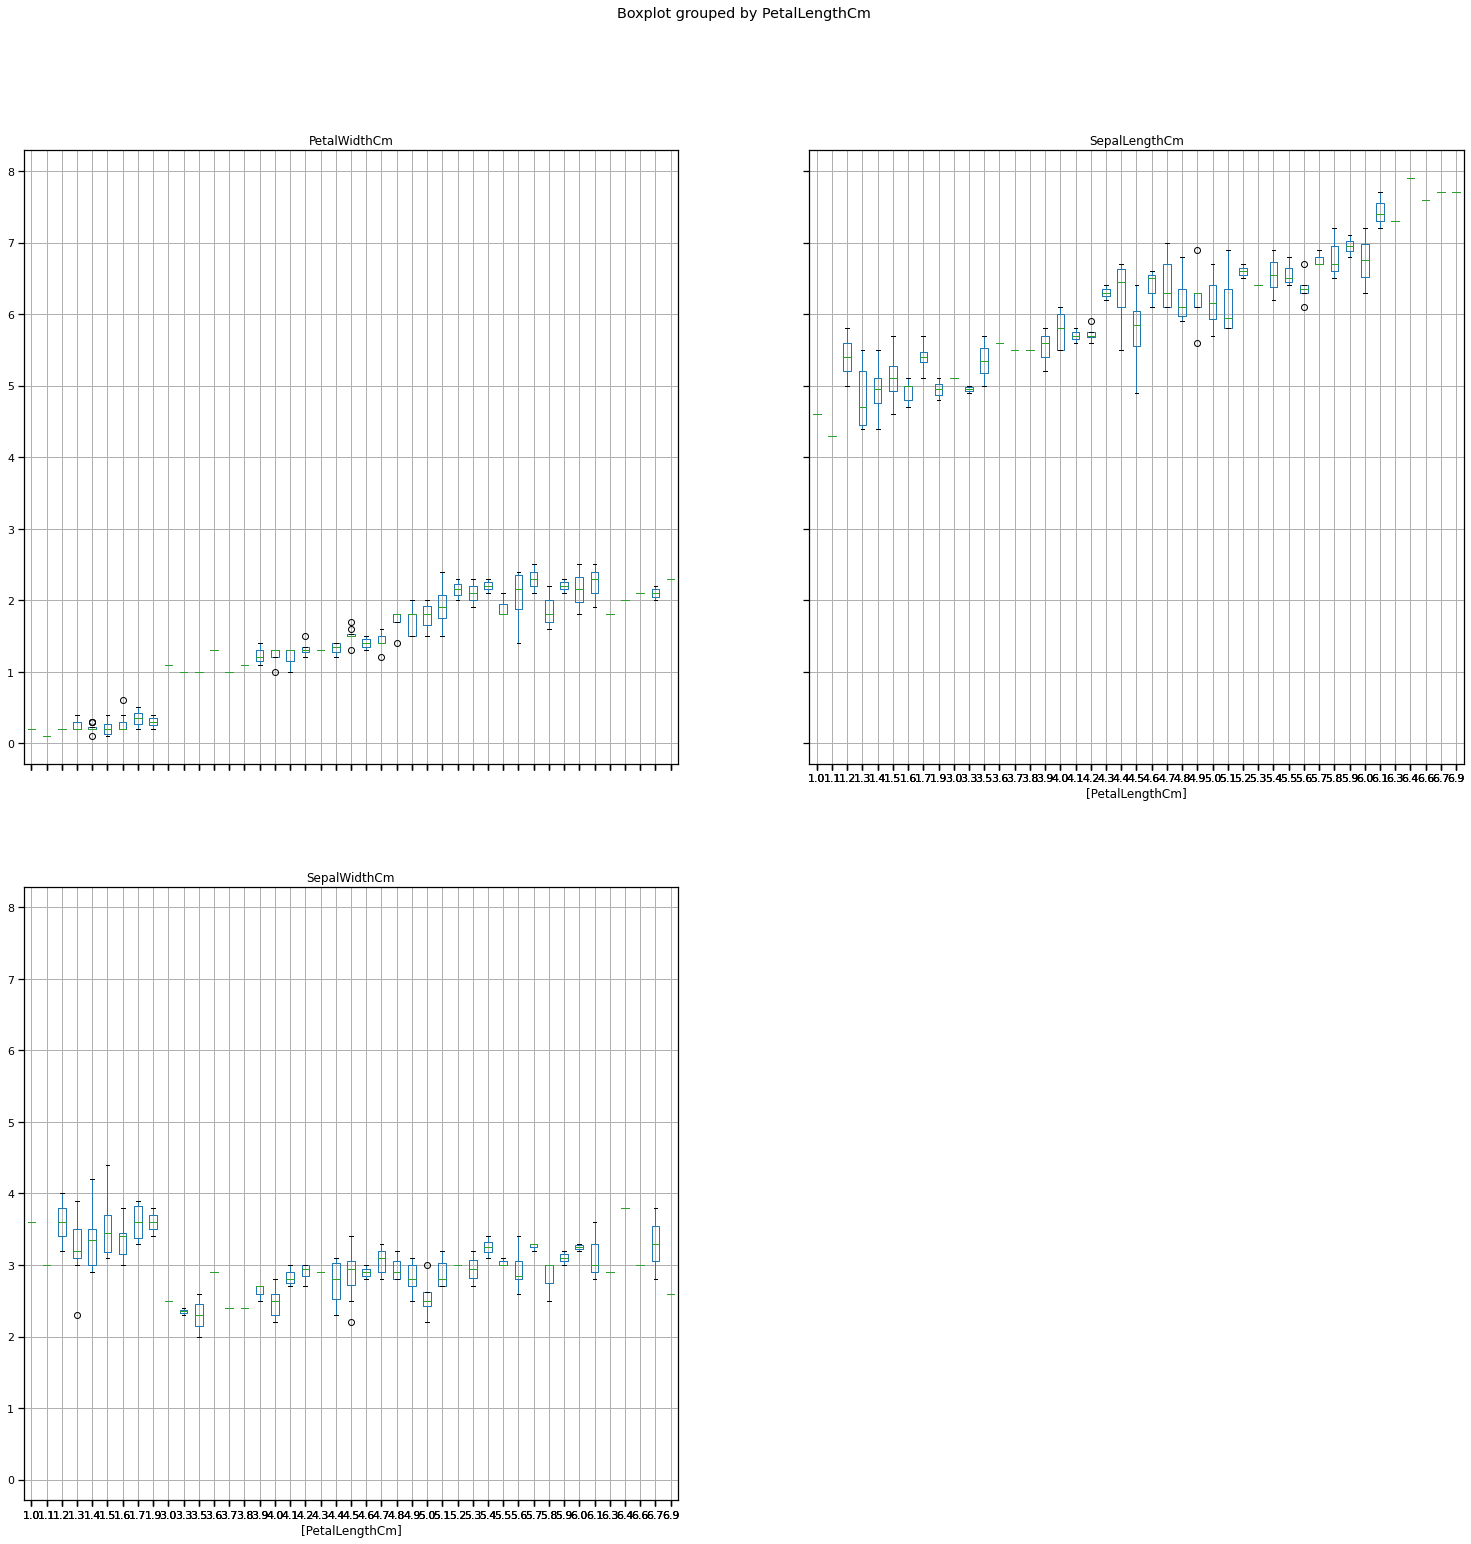

In [36]:
data.boxplot(by=('PetalLengthCm'),figsize=(25,25))

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[PetalWidthCm]'>,
        <AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[PetalWidthCm]'>],
       [<AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[PetalWidthCm]'>,
        <AxesSubplot:>]], dtype=object)

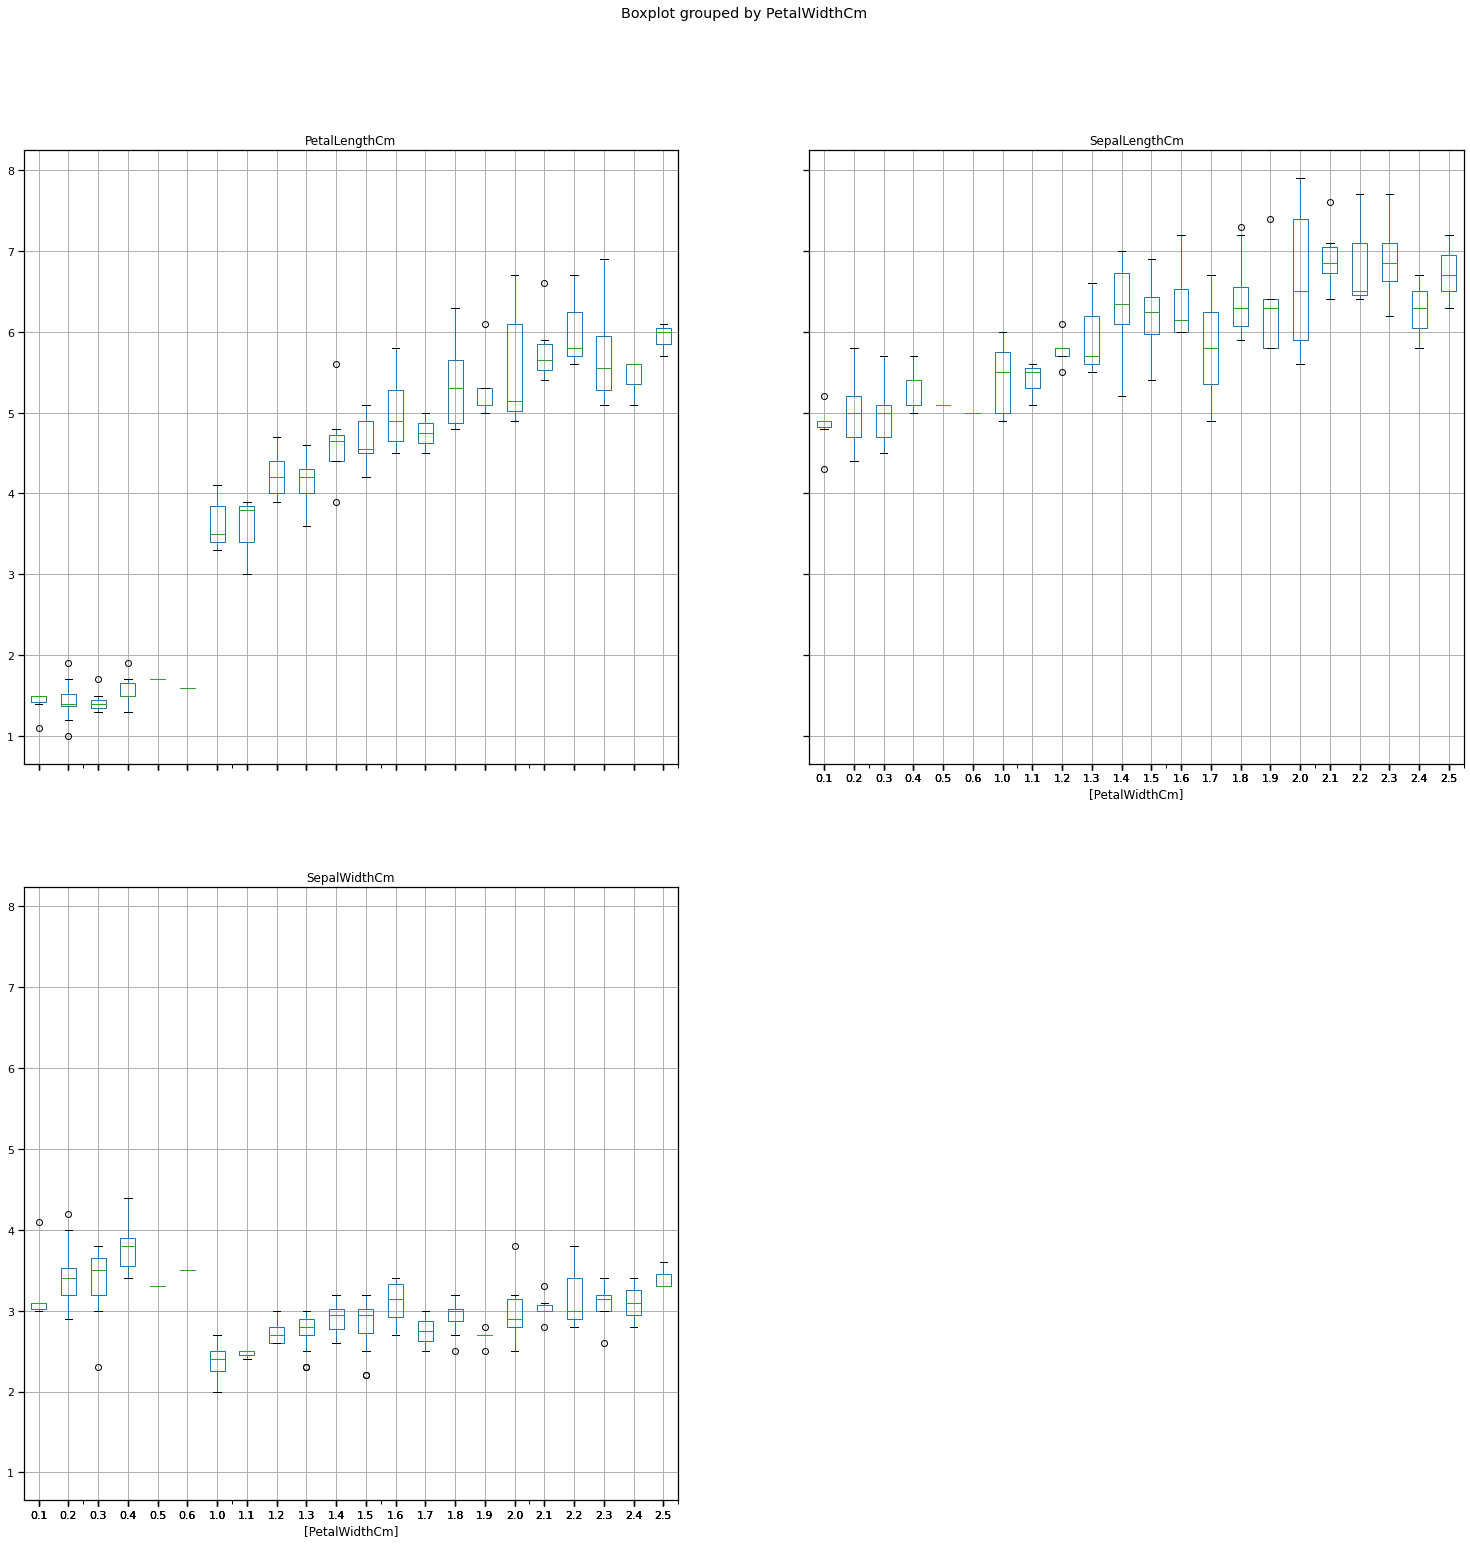

In [37]:
data.boxplot(by=('PetalWidthCm'),figsize=(25,25))

In [38]:
#Correct Way
data.set_index('Species').stack().to_frame()

0
Species                          
Iris-setosa    SepalLengthCm  5.1
               SepalWidthCm   3.5
               PetalLengthCm  1.4
               PetalWidthCm   0.2
               SepalLengthCm  4.9
...                           ...
Iris-virginica PetalWidthCm   2.3
               SepalLengthCm  5.9
               SepalWidthCm   3.0
               PetalLengthCm  5.1
               PetalWidthCm   1.8

[600 rows x 1 columns]

In [39]:
data.set_index('Species').stack().to_frame().reset_index()

,Species,level_1,0
0,Iris-setosa,SepalLengthCm,5.1
1,Iris-setosa,SepalWidthCm,3.5
2,Iris-setosa,PetalLengthCm,1.4
3,Iris-setosa,PetalWidthCm,0.2
4,Iris-setosa,SepalLengthCm,4.9
...,...,...,...
595,Iris-virginica,PetalWidthCm,2.3
596,Iris-virginica,SepalLengthCm,5.9
597,Iris-virginica,SepalWidthCm,3.0
598,Iris-virginica,PetalLengthCm,5.1


In [40]:
data1=data.set_index('Species').stack().to_frame().reset_index().rename(columns={0:'Size','level_1':'Measurement'})
data1

,Species,Measurement,Size
0,Iris-setosa,SepalLengthCm,5.1
1,Iris-setosa,SepalWidthCm,3.5
2,Iris-setosa,PetalLengthCm,1.4
3,Iris-setosa,PetalWidthCm,0.2
4,Iris-setosa,SepalLengthCm,4.9
...,...,...,...
595,Iris-virginica,PetalWidthCm,2.3
596,Iris-virginica,SepalLengthCm,5.9
597,Iris-virginica,SepalWidthCm,3.0
598,Iris-virginica,PetalLengthCm,5.1


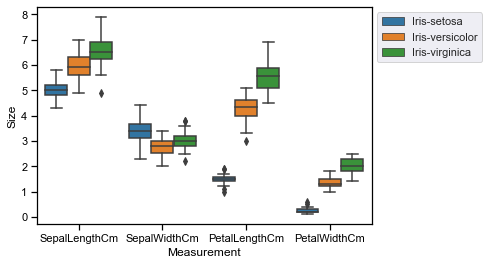

In [41]:
sns.boxplot(x='Measurement',y='Size',hue='Species',data=data1)
sns.set(rc={'figure.figsize':(10,10)})
plt.legend(bbox_to_anchor=(1,1))

# Models -

In [42]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.4, stratify = data['Species'], random_state = 42)

In [43]:
x_train=train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_train=train[['Species']]
x_test=test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_test=test[['Species']]

In [44]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Decision Tree Classifier

In [45]:
dt=DecisionTreeClassifier(max_depth = 3, random_state = 1)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [46]:
dt.fit(x_test,y_test)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [47]:
dt.score(x_test,y_test)

0.9833333333333333

In [48]:
prediction=dt.predict(x_test)
print('The accuracy of the Decision Tree is','{:.3f}'.format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.983


In [49]:
#To see the importance of each feature 
dt.feature_importances_

array([0.        , 0.        , 0.41896552, 0.58103448])

In [ ]:
#Now it is clear that sepal measurements play no role in determining the type of iris the sample is.

# Gaussian NB Classifier

In [50]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

C:\Users\Aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [51]:
gnb.fit(x_test,y_test)

C:\Users\Aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [52]:
prediction=gnb.predict(x_test)

In [56]:
gnb.score(x_test,y_test)

0.9666666666666667

# KNN - Classifier

In [64]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

C:\Users\Aditi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [65]:
knn.fit(x_test,y_test)

C:\Users\Aditi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [66]:
prediction=knn.predict(x_test)
print(prediction)

['Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa']


In [67]:
knn.score(x_test,y_test)

0.9666666666666667

# SVC

In [69]:
svc=SVC(kernel='linear') 
svc.fit(x_train, y_train)

C:\Users\Aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [71]:
svc.fit(x_test,y_test)

C:\Users\Aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [72]:
prediction=svc.predict(x_test)
prediction

array(['Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iri

In [73]:
svc.score(x_test,y_test)

0.95

# Logistic Regression

In [74]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\Aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Aditi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
lr.fit(x_test,y_test)

C:\Users\Aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [77]:
prediction=lr.predict(x_test)
prediction

array(['Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris

In [78]:
lr.score(x_test,y_test)

0.9666666666666667

In [80]:
#Printing the accuracy for each model - 
print("Decision Tree Classifier - ",dt.score(x_test,y_test))
print("Gusian Naive Bayesian - ",gnb.score(x_test,y_test))
print("KNN - ",knn.score(x_test,y_test))
print("SVC - ",svc.score(x_test,y_test))
print("Logistic Regression - ",lr.score(x_test,y_test))

Decision Tree Classifier -  0.9833333333333333
Gusian Naive Bayesian -  0.9666666666666667
KNN -  0.9666666666666667
SVC -  0.95
Logistic Regression -  0.9666666666666667


Now it is clear that we are getting the maximum accuracy from the Decision Tree Classifier.

[Text(209.25, 475.65000000000003, 'X[3] <= 0.8\ngini = 0.667\nsamples = 60\nvalue = [20, 20, 20]'),
 Text(139.5, 339.75, 'gini = 0.0\nsamples = 20\nvalue = [20, 0, 0]'),
 Text(279.0, 339.75, 'X[2] <= 4.75\ngini = 0.5\nsamples = 40\nvalue = [0, 20, 20]'),
 Text(139.5, 203.85000000000002, 'X[3] <= 1.65\ngini = 0.095\nsamples = 20\nvalue = [0, 19, 1]'),
 Text(69.75, 67.94999999999999, 'gini = 0.0\nsamples = 19\nvalue = [0, 19, 0]'),
 Text(209.25, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(418.5, 203.85000000000002, 'X[3] <= 1.75\ngini = 0.095\nsamples = 20\nvalue = [0, 1, 19]'),
 Text(348.75, 67.94999999999999, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(488.25, 67.94999999999999, 'gini = 0.0\nsamples = 17\nvalue = [0, 0, 17]')]

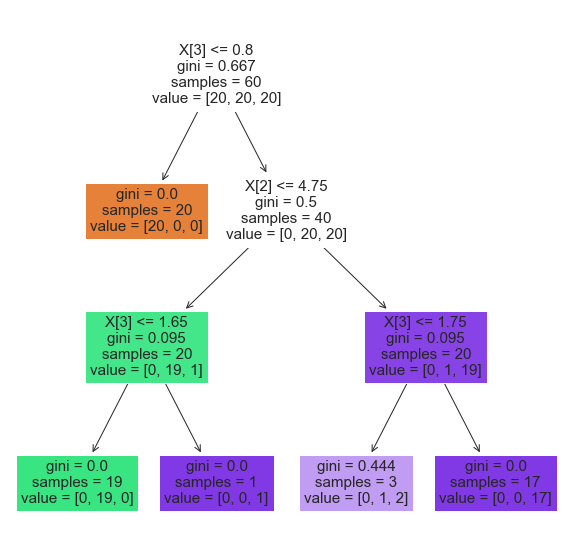

In [86]:
from sklearn import tree
tree.plot_tree(dt,filled=True)